In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.spatial.distance import cdist

## import the library below:

In [3]:
from PyEyeSim import EyeData


In [4]:
%load_ext autoreload
%autoreload 2

## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [5]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged_fixations.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0)
print(np.shape(FixData))


(48675, 19)


In [6]:
FixData

,id,task,sid,eye,stimfile,trialid,start_ms,end_ms,duration_ms,fix_x,fix_y,orig_fix_x,orig_fix_y,disp_x,disp_y,aoi_subline,aoi_line,class_id,label
0,0,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328491.191,328683.159,195.970,161.4900,160.5,161.4900,170.9400,0.594205,0.705880,NaN,NaN,0,non-dyslexic
1,1,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328747.177,328995.193,252.016,338.1850,160.5,338.1850,171.8650,0.422989,0.336236,line_001-part_001,line_001,0,non-dyslexic
2,2,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329063.199,329423.075,363.875,450.4050,160.5,450.4050,168.0550,1.145977,0.658192,line_001-part_002,line_001,0,non-dyslexic
3,3,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329483.064,329743.065,264.002,582.0225,160.5,582.0225,161.0100,0.424336,0.370587,line_001-part_003,line_001,0,non-dyslexic
4,4,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329775.070,330143.065,371.993,467.5750,160.5,467.5750,168.8450,0.640545,0.806104,line_001-part_002,line_001,0,non-dyslexic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48670,334,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1961417.270,1962009.528,596.258,1088.0100,750.5,1088.0100,746.2650,0.730936,0.781587,line_007-part_012,line_007,1,dyslexic
48671,335,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962017.528,1962309.460,295.932,1131.6575,750.5,1131.6575,748.9950,0.823347,1.023660,line_007-part_013,line_007,1,dyslexic
48672,336,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962401.460,1962829.128,431.659,1091.3025,750.5,1091.3025,740.7075,0.480914,0.701434,line_007-part_012,line_007,1,dyslexic
48673,337,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962853.077,1964713.191,1864.113,1150.5975,750.5,1150.5975,748.6900,1.752710,1.072156,line_007-part_013,line_007,1,dyslexic


## Step 2

#### pass pandas dataframe, to pyeyesim, providing information on screen size in pixels

(we run the pipeline here because this nb is to demonstrate the inference pipeline not the descriptives)


dataset size:  (48675, 19)
presentation size:  x= 1680 pixels y= 1050  pixels
presentation size:  x= 1680 pixels y= 1050  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 70 subjects, and 3 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
s7_stimuli_t1.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t4.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t5.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
stimuli loaded succesfully, access as self.images
run descriptive analysis
Data for  70 observers and  3  stimuli.
Mean fixation number:  231.79  +/-  6

(array(['s7_stimuli_t1.jpg', 's7_stimuli_t4.jpg', 's7_stimuli_t5.jpg'],
       dtype=object),
 array([1003, 1009, 1016, 1019, 1021, 1033, 1038, 1040, 1058, 1065, 1073,
        1075, 1082, 1090, 1095, 1109, 1113, 1115, 1134, 1145, 1160, 1166,
        1169, 1174, 1186, 1187, 1189, 1209, 1235, 1254, 1255, 1257, 1258,
        1263, 1271, 1274, 1284, 1300, 1312, 1314, 1318, 1322, 1345, 1349,
        1350, 1377, 1380, 1398, 1405, 1417, 1421, 1459, 1476, 1571, 1582,
        1591, 1626, 1693, 1729, 1744, 1760, 1858, 1859, 1869, 1879, 1903,
        1913, 1929, 1993, 1996], dtype=int64))

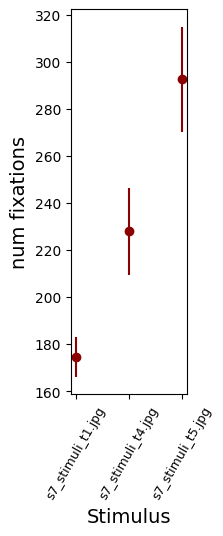

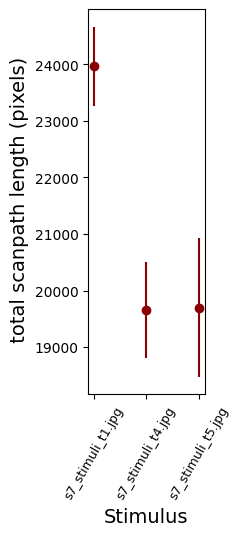

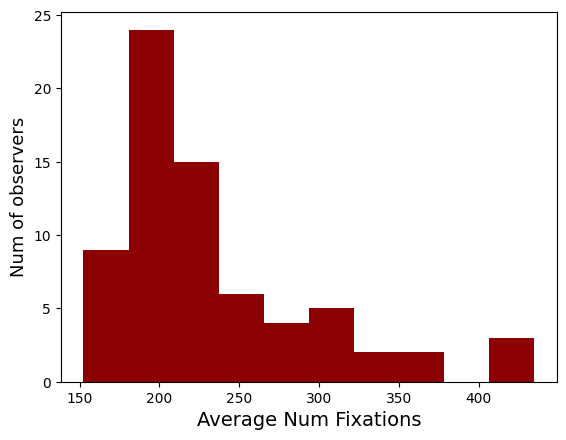

In [7]:

sizeX,sizeY=1680,1050


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(FixDuration='length',Stimulus='stimfile',subjectID='sid',StimPath=Path+'images/',StimExt='.jpg', mean_x='fix_x', mean_y='fix_y')
DyslexiaDat.RunDescriptiveFix(Visual=1)


In [11]:
DyslexiaDat.GetGroups('class_id')

Conditions [0 1]


(array([0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]),
 array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1], dtype=object))

In [21]:
def correctSub2Sub(Matrix):
    """
    Remove all the value equal to -np.inf and retrun the corrected matrix and a list of value that are not removed (position)
    """
    position = set()
    for i in range(Matrix.shape[0]):
        for j in range(Matrix.shape[1]):
            if Matrix[i,j] != -np.inf:
                position.add(i)

    CorrectMatrix = np.zeros((len(position),len(position)))
    position = list(position)
    for i in range(len(position)):
        for j in range(len(position)):
            CorrectMatrix[i,j] = Matrix[position[i],position[j]]

    return CorrectMatrix, position

## Stimuli comparison

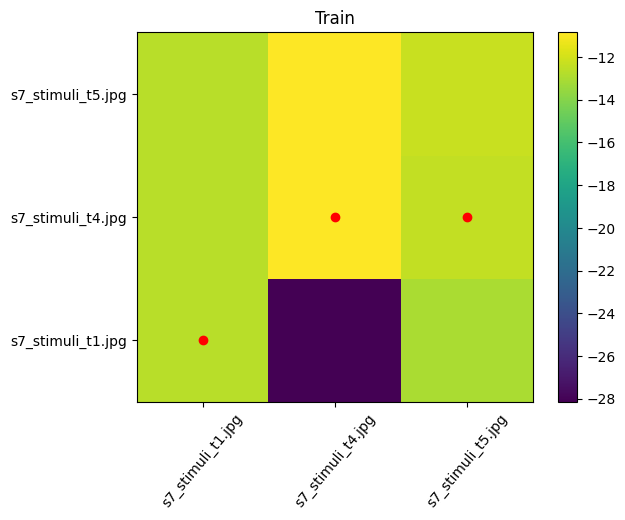

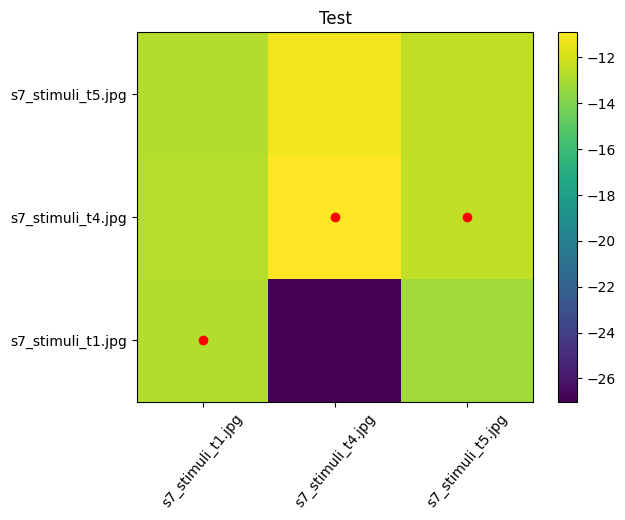

In [9]:
S0, S1 = DyslexiaDat.HMMSimPipelineAll2All(ncomp=7, ntest=3)

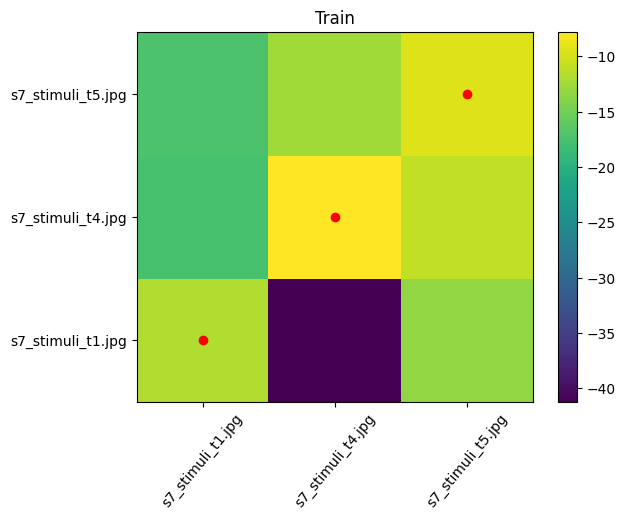

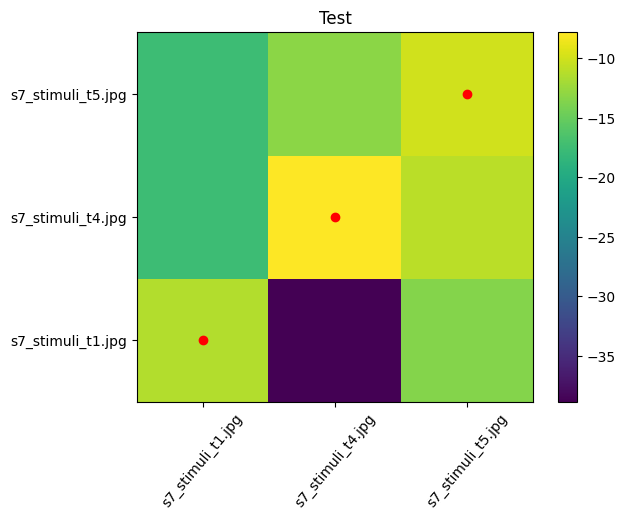

In [10]:
S0, S1 = DyslexiaDat.HMMSimPipelineAll2All(ncomp=[2,3,4,5,6,7,8,9,10], ntest=3)

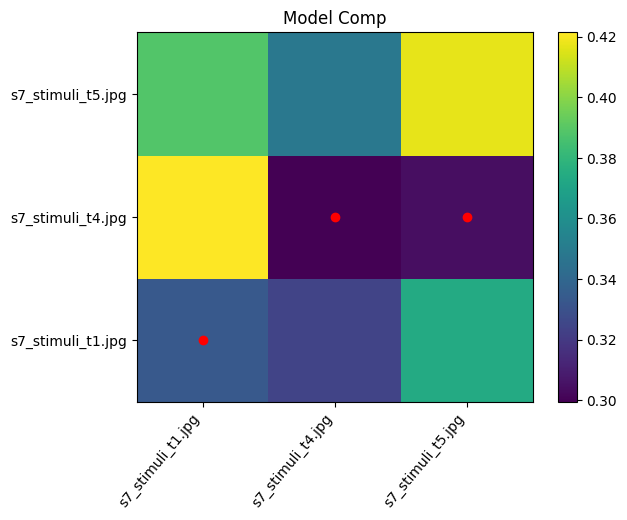

In [11]:
S = DyslexiaDat.HMMSimPiepelineModel2Model(ncomp=[2,3,4,5,6,7,8,9,10])

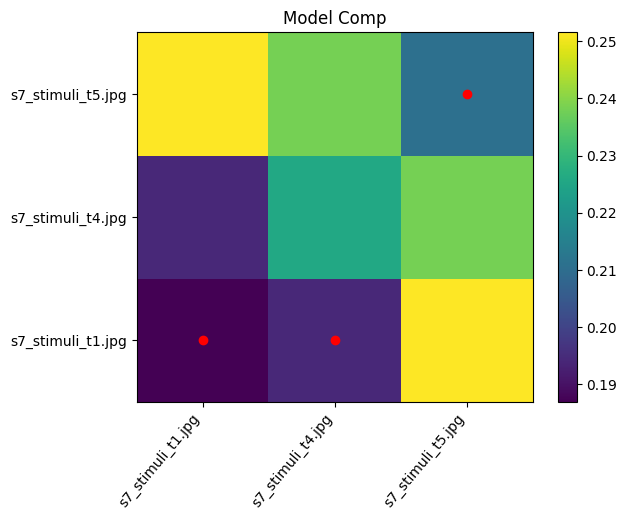

In [ ]:
# 4 minutes
S = DyslexiaDat.HMMSimPiepelineModel2ModelOpt(ncomp=[2,3,4,5,6,7,8,9,10], covar='spherical')

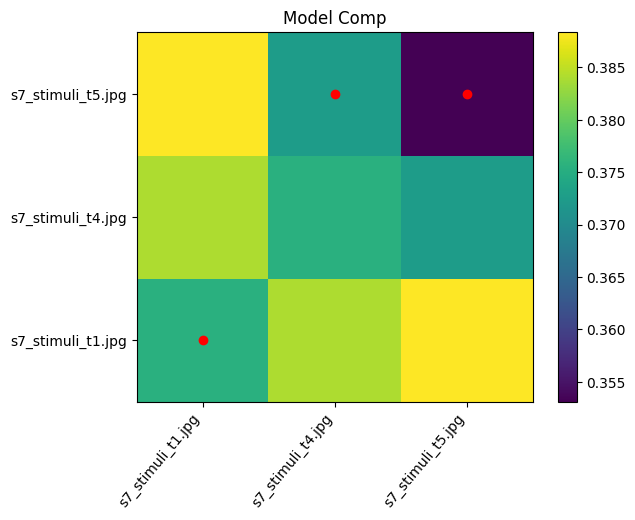

In [ ]:
# ~48 minutes
S = DyslexiaDat.HMMSimPiepelineModel2ModelOpt(ncomp=[15,25,35,45,50], covar='spherical')

As we can see we need to higly increase the number of component in order to obtain a desiderable results.

Unfortunatly is not possible to use the full covariance method with this amount of component (the library will give some error on the comavariance matrix).

Now we can compare the results with the Angle Method

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades
C:\Users\nickp\AppData\Local\Temp\ipykernel_37448\3345647143.py:3: RuntimeWarning: Mean of empty slice
  S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)


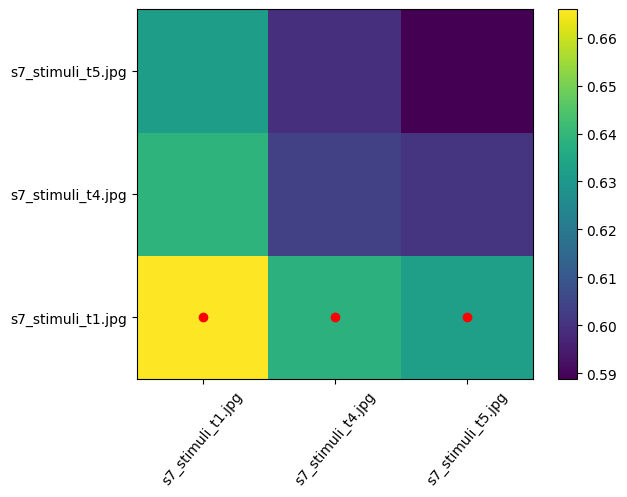

In [70]:
Sacc = DyslexiaDat.SaccadeSel(DyslexiaDat.GetSaccades(), nHor=9, InferS=False)
SimSacP = DyslexiaDat.SacSim1GroupAll2All(Sacc, Thr=10, normalize='add')
S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)
DyslexiaDat.VisSimmat(S)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades
C:\Users\nickp\AppData\Local\Temp\ipykernel_37448\2028555390.py:3: RuntimeWarning: Mean of empty slice
  S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)


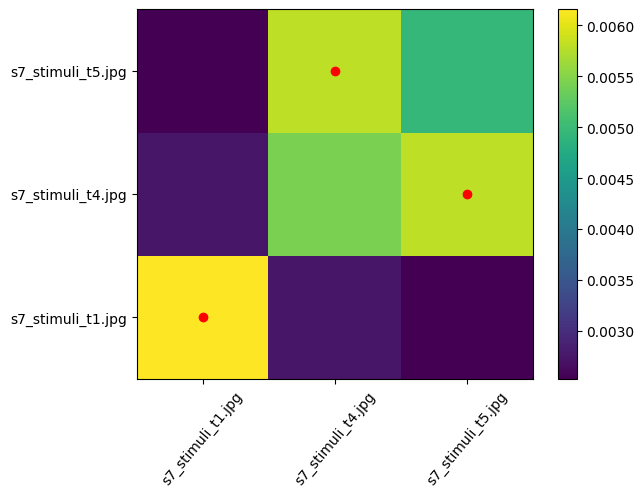

In [74]:
Sacc = DyslexiaDat.SaccadeSel(DyslexiaDat.GetSaccades(), nHor=9, InferS=False)
SimSacP = DyslexiaDat.SacSim1GroupAll2All(Sacc, Thr=0.01, normalize='add')
S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)
DyslexiaDat.VisSimmat(S)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades
C:\Users\nickp\AppData\Local\Temp\ipykernel_37448\883997697.py:3: RuntimeWarning: Mean of empty slice
  S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)


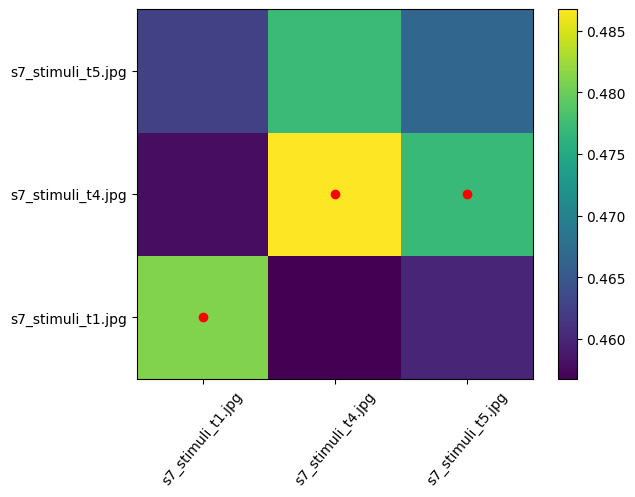

In [495]:
Sacc = DyslexiaDat.SaccadeSel(DyslexiaDat.GetSaccades(), nHor=20, InferS=False)
SimSacP = DyslexiaDat.SacSim1GroupAll2All(Sacc, Thr=5, normalize='add')
S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)
DyslexiaDat.VisSimmat(S)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades
C:\Users\nickp\AppData\Local\Temp\ipykernel_37448\4195317493.py:3: RuntimeWarning: Mean of empty slice
  S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)


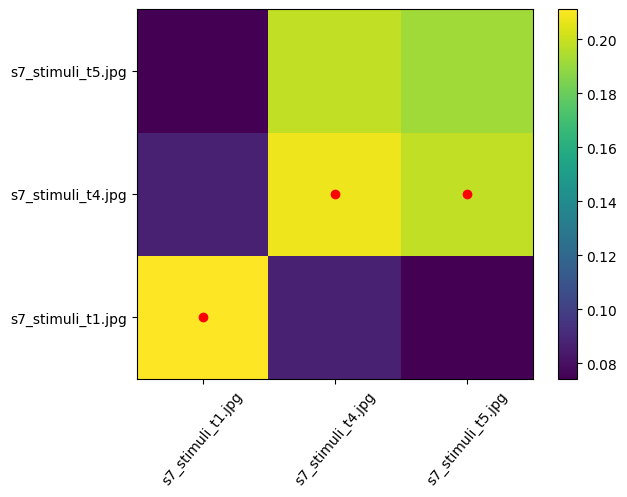

In [498]:
Sacc = DyslexiaDat.SaccadeSel(DyslexiaDat.GetSaccades(), nHor=25, InferS=False)
SimSacP = DyslexiaDat.SacSim1GroupAll2All(Sacc, Thr=0.5, normalize='add')
S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)
DyslexiaDat.VisSimmat(S)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades
C:\Users\nickp\AppData\Local\Temp\ipykernel_37448\1816322735.py:3: RuntimeWarning: Mean of empty slice
  S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)


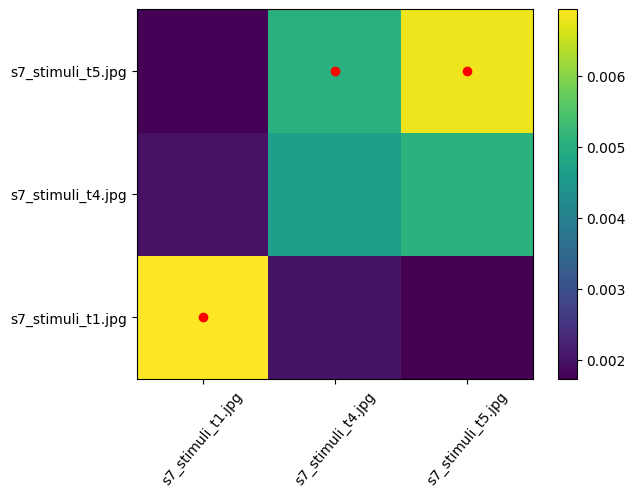

In [501]:
Sacc = DyslexiaDat.SaccadeSel(DyslexiaDat.GetSaccades(), nHor=25, InferS=False)
SimSacP = DyslexiaDat.SacSim1GroupAll2All(Sacc, Thr=0.01, normalize='add')
S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)
DyslexiaDat.VisSimmat(S)

## Subject with Subject

In [15]:
stim = DyslexiaDat.stimuli[0]
stim

's7_stimuli_t1.jpg'

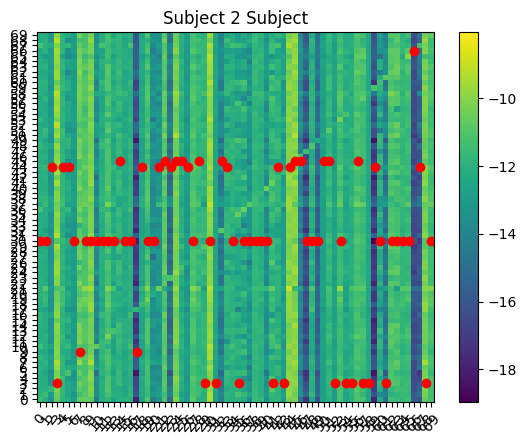

In [16]:
S = DyslexiaDat.HMMSimPipelineSubject2Subject(ncomp=[5,6,7,8,9,10], iter=1, stim=stim)

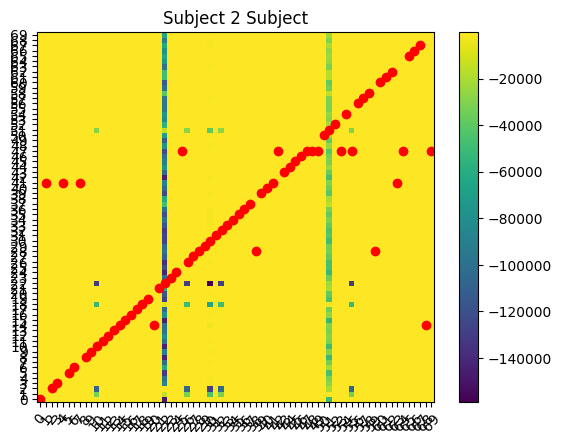

In [524]:
S = DyslexiaDat.HMMSimPipelineSubject2Subject(ncomp=[15], iter=1, stim=stim, covar='spherical')

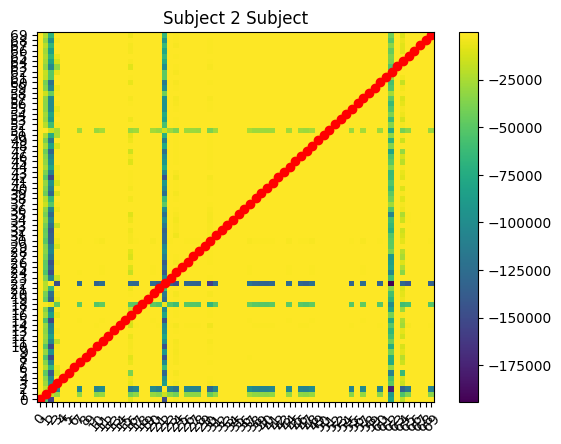

In [530]:
S = DyslexiaDat.HMMSimPipelineSubject2Subject(ncomp=[30], iter=10, stim=stim, covar='spherical')

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


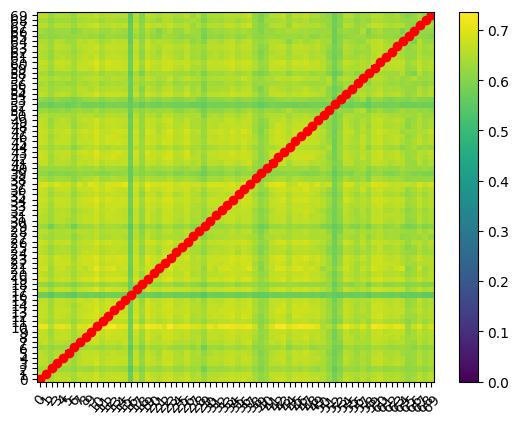

In [22]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=9, Thr=10, inferS=False,normalize='add')
S, ns = correctSub2Sub(SimVals)
DyslexiaDat.VisSimmat(S, stimuli=list(ns), negative=True)

In [27]:
stim = DyslexiaDat.stimuli[1]
stim

's7_stimuli_t4.jpg'

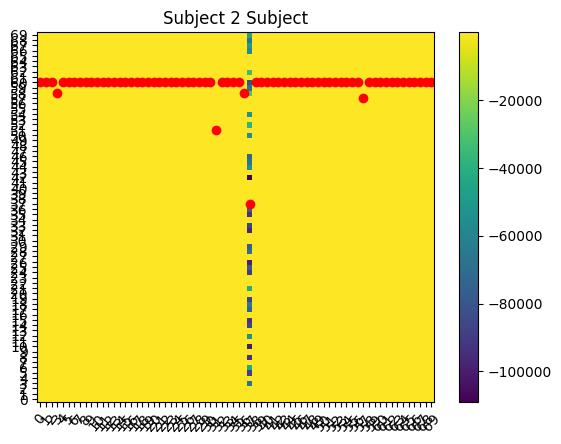

In [28]:
S = DyslexiaDat.HMMSimPipelineSubject2Subject(ncomp=[7,8,9,10], stim=stim)

In [30]:
try:
    S = DyslexiaDat.HMMSimPipelineSubject2Subject(ncomp=[15], stim=stim)
except ValueError as e:
    print(e)

No model could be fitted: try different parameters


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


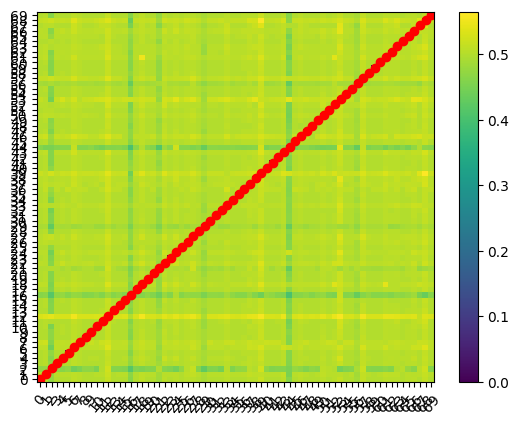

In [63]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=2, nHor=15, Thr=10, inferS=False,normalize='add')
S, ns = correctSub2Sub(SimVals)
DyslexiaDat.VisSimmat(S, stimuli=list(ns), negative=True)

In [64]:
# check location of highest value in the matrix
i,j = np.unravel_index(S.argmax(), S.shape)
print(S.argmax())
print(i,j)

2798
39 68


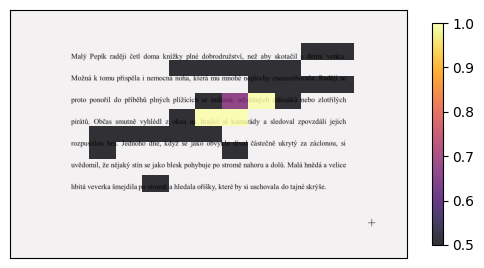

In [65]:
DyslexiaDat.VisGrid(SimSacP[i,j],stim,cbar=True,inferS=False,alpha=.8)

In [66]:
# check location of lowst value in the matrix where i!=j
i,j = np.unravel_index(S[S != 0].argmin(), S.shape)
print(S[S != 0].argmin())
print(i,j)

1147
16 27


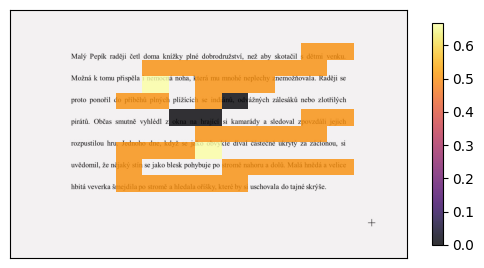

In [67]:
DyslexiaDat.VisGrid(SimSacP[i,j],stim,cbar=True,inferS=False,alpha=.8)

-------------------------

!runnning between group comparison
Conditions [0 1]
Calculating entropy
resolution x = 1680  y = 1050
0 s7_stimuli_t1.jpg 5.07 maximum entropy 5.86
resolution x = 1680  y = 1050
1 s7_stimuli_t4.jpg 4.93 maximum entropy 5.62
resolution x = 1680  y = 1050
2 s7_stimuli_t5.jpg 4.95 maximum entropy 5.62
0 0 num participants:  35
0 0 Num fix=  190.99 +/- 18.65
0 0 Entropy=  4.62 +/- 0.05
0 0 tot scanpath len =  19563.62 +/- 1441.71 pix
0 0 saccade amplitude =  109.32 +/- 9.03 pix

1 1 num participants:  35
1 1 Num fix=  272.58 +/- 67.42
1 1 Entropy=  4.67 +/- 0.05
1 1 tot scanpath len =  22651.58 +/- 3941.16 pix
1 1 saccade amplitude =  92.36 +/- 13.29 pix


 
Overall group differences:  0 vs 1
Entropy t= -3.7234 , p= 0.0004
Num Fix t= -6.8013 , p=  0.0
Scanpath lengths t= -4.2906 , p= 0.0001
Saccade amplitudes t= 6.1595 , p= 0.0
 


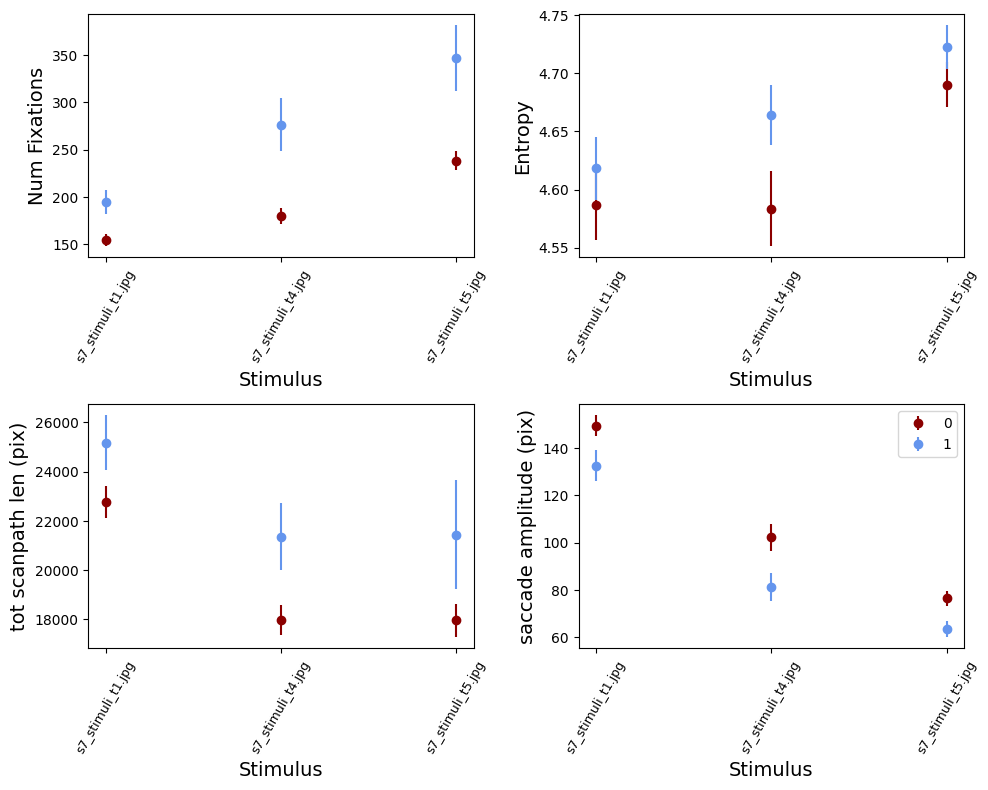

In [106]:
DyslexiaDat.CompareGroupsFix('class_id')

Conditions [0 1]


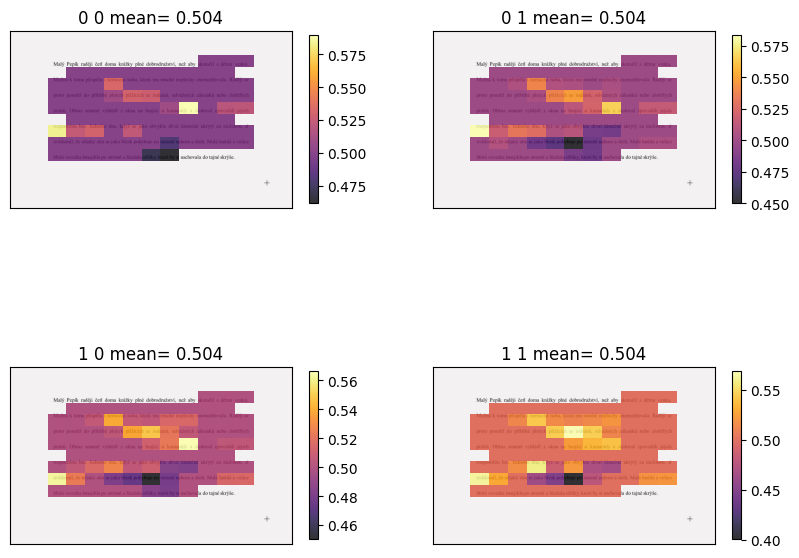

In [ ]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id',normalize='add', nHor=15, Thr=10, inferS=False)

Conditions [0 1]


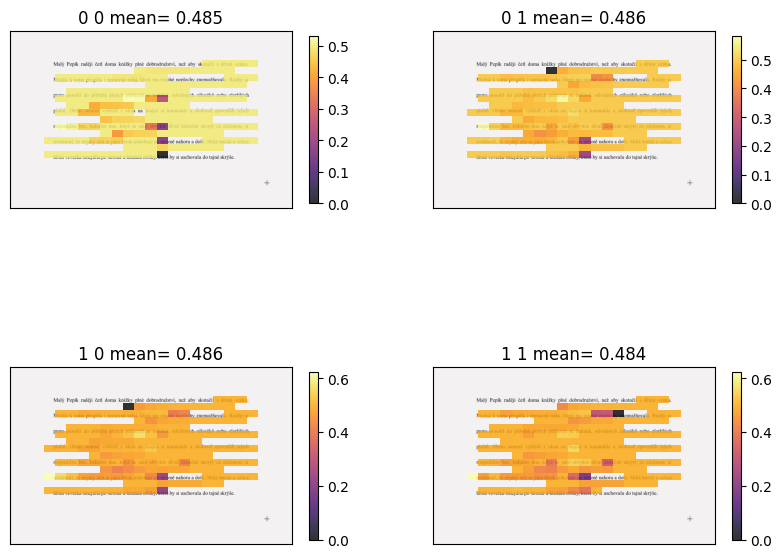

In [533]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id',normalize='add', nHor=25, Thr=5, inferS=False)

## HMM

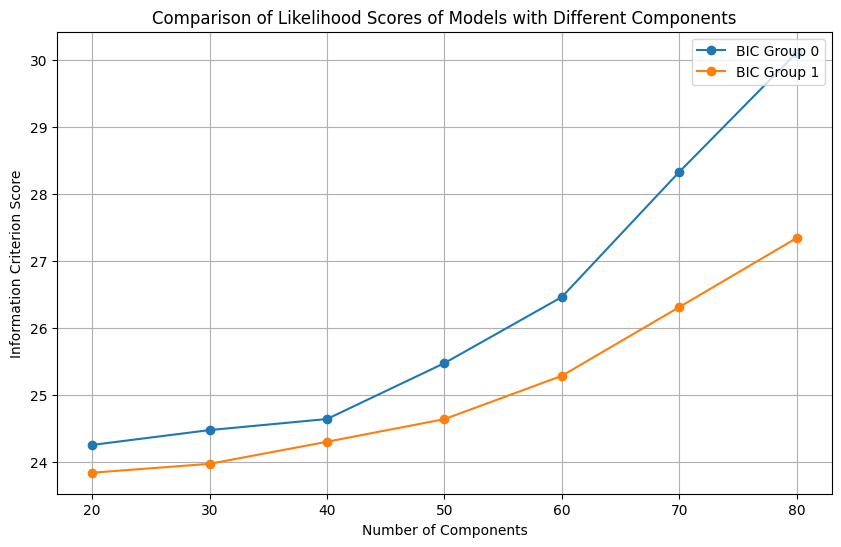

In [132]:
results = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[stimn], [20,30,40,50,60,70,80], group=[0,1], n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

In [142]:
hmm_models = [results[0][0][3], results[1][0][3]]

r = DyslexiaDat.compare_hmm_models_with_scores(hmm_models)
r['final_scores']

0.43428853365734454

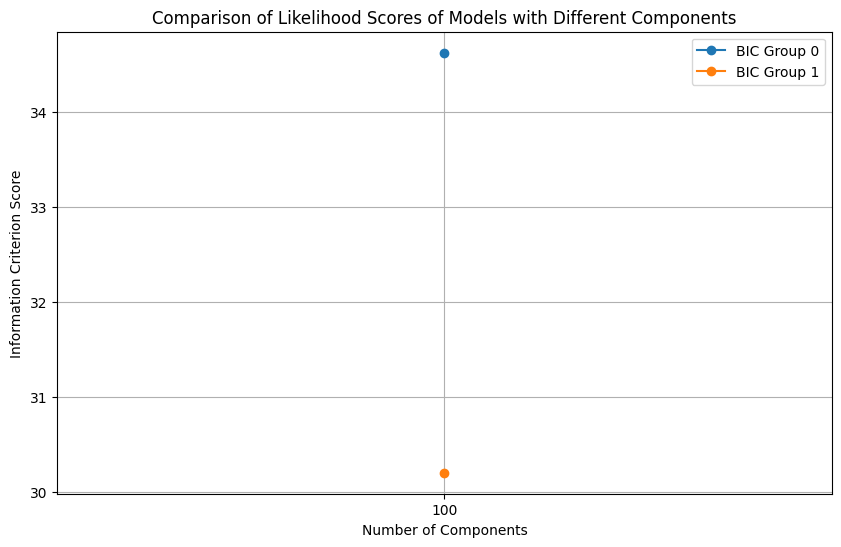

In [438]:
results0 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[stimn], [100], group=[0,1], select_subj=0, remove_subj=True, group_subj=0, n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

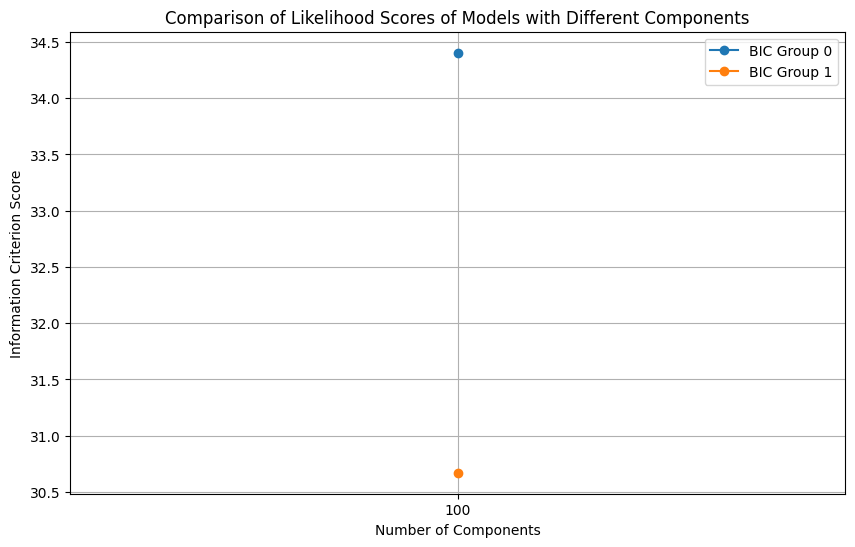

In [441]:
results1 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[stimn], [100], group=[0,1], select_subj=0, remove_subj=True, group_subj=1, n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

Fitting a model with 10299 free scalar parameters with only 282 data points will result in a degenerate solution.


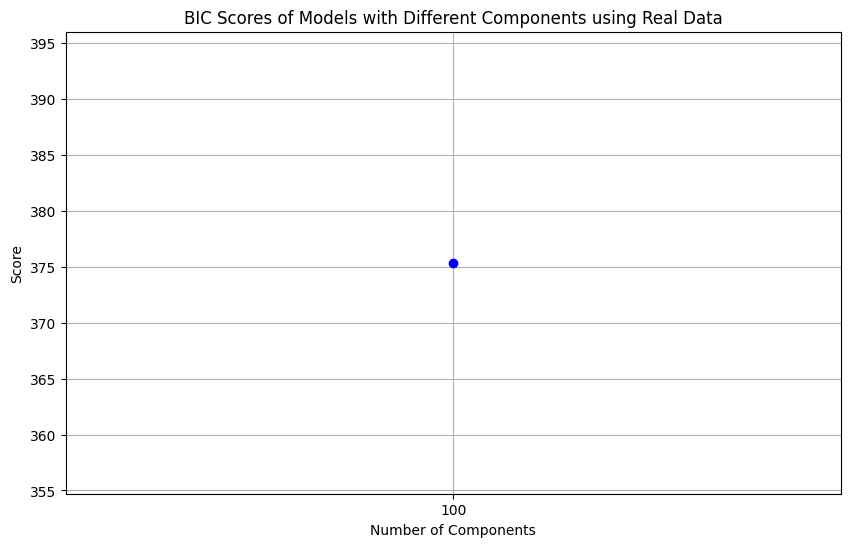

In [414]:
subj_res_g0 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[stimn], [100], group=0, select_subj=0, n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

Fitting a model with 10299 free scalar parameters with only 442 data points will result in a degenerate solution.


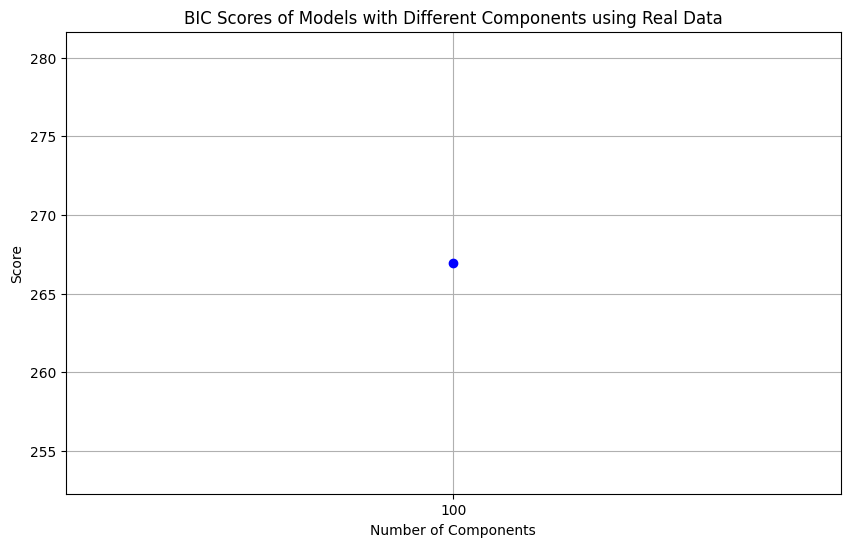

In [419]:
subj_res_g1 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[stimn], [100], group=1, select_subj=0, n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

In [445]:
hmm_models = [results0[0][0][0], results0[1][0][0]]
r = DyslexiaDat.compare_hmm_models_with_scores(hmm_models)
print(r['final_scores'])
hmm_models = [results0[0][0][0], subj_res_g0[0][0][0]]
r = DyslexiaDat.compare_hmm_models_with_scores(hmm_models)
print(r['final_scores'])
hmm_models = [results0[1][0][0], subj_res_g0[0][0][0]]
r = DyslexiaDat.compare_hmm_models_with_scores(hmm_models)
print(r['final_scores'])


0.43088026886548997
0.46337339888394685
0.45253880126153395


In [ ]:
hmm_models = [results1[0][0][0], results1[1][0][0]]
r = DyslexiaDat.compare_hmm_models_with_scores(hmm_models)
print(r['final_scores'])
hmm_models = [results1[0][0][0], subj_res_g1[0][0][0]]
r = DyslexiaDat.compare_hmm_models_with_scores(hmm_models)
print(r['final_scores'])
hmm_models = [results1[1][0][0], subj_res_g1[0][0][0]]
r = DyslexiaDat.compare_hmm_models_with_scores(hmm_models)
print(r['final_scores'])

0.4369689273126542
0.4590659554507672
0.45448784696308325


In [447]:
def plot_multiple_simulations(self, stim_list, models_list, simulated_X_list, simulated_Y_list, n_components_list_list, new_list_len_list, labels=None):
    """
    Plot a 1x3 grid of simulated data for multiple sets of inputs.

    Parameters
    ----------
    stim_list : list
        List of stimulus numbers for each set of data (length 3).
        
    models_list : list
        List of lists, where each sublist contains fitted GaussianHMM models for each set of data.
        
    simulated_X_list : list
        List of lists of simulated X-axis eye movement data for each set of data.
        
    simulated_Y_list : list
        List of lists of simulated Y-axis eye movement data for each set of data.
        
    n_components_list_list : list
        List of lists, where each sublist contains the numbers of components for each set of data.
        
    new_list_len_list : list
        List of lists of fixation lengths for each scanpath for each set of data.
    """

    # if all the same stimulus, make the int a list
    if isinstance(stim_list, int) or isinstance(stim_list, float):
        stim_list = [stim_list for _ in range(3)]

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    fig.suptitle('Comparison of Simulated Data for Different Models', fontsize=18)

    # Flatten the axes for easier access in a loop
    axes = axes.ravel()

    for i in range(3):
        stim = stim_list[i]
        models = models_list[i]
        simulated_X = simulated_X_list[i]
        simulated_Y = simulated_Y_list[i]
        n_components_list = n_components_list_list[i]
        new_list_len = new_list_len_list[i]
        
        if labels is None:
            axes[i].set_title(f'Simulated Fixation for Model {i}', fontsize=12)
        else:
            x = new_list_len[0]
            if isinstance(x, np.ndarray):
                s = len(x)
                x = sum(x)
            else:
                s = 1
            axes[i].set_title(f'{labels[i]}, {x} fixation per {s} subjects', fontsize=12)

        for j, (n_components, sim_X, sim_Y, model) in enumerate(zip(n_components_list, simulated_X, simulated_Y, models)):
            self.VisHMM(np.column_stack((sim_X, sim_Y)), model, ax=axes[i], stim=stim, lengths=new_list_len)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
X0, Y0, l0 = DyslexiaDat.get_data(DyslexiaDat.stimuli[stimn], group=0, subject=0)
X1, Y1, l1 = DyslexiaDat.get_data(DyslexiaDat.stimuli[stimn], group=0, subject=0, remove_subj=True)
X2, Y2, l2 = DyslexiaDat.get_data(DyslexiaDat.stimuli[stimn], group=1)

In [449]:
X0 = [X0.reshape(-1, 1)]
Y0 = [Y0.reshape(-1, 1)]
X1 = [X1.reshape(-1, 1)]
Y1 = [Y1.reshape(-1, 1)]
X2 = [X2.reshape(-1, 1)]
Y2 = [Y2.reshape(-1, 1)]

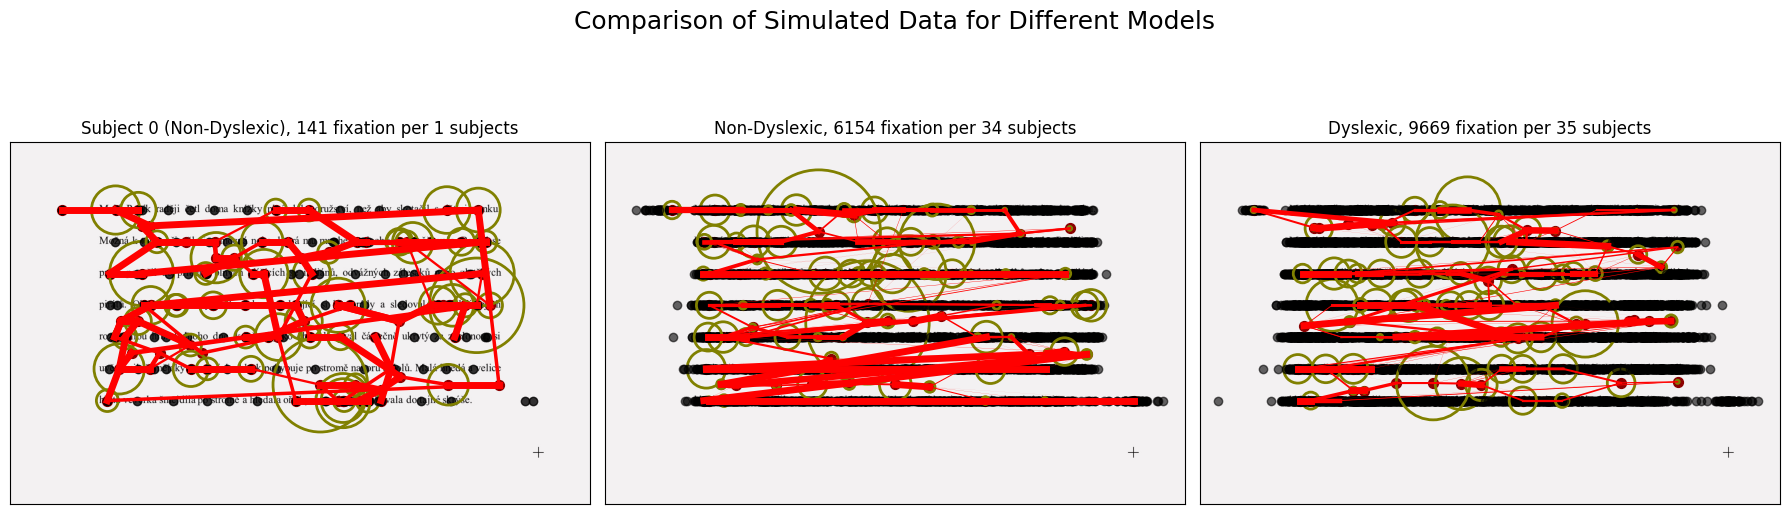

In [450]:
plot_multiple_simulations(DyslexiaDat, [DyslexiaDat.stimuli[stimn]]*3, [[subj_res_g0[0][0][0]], [results0[0][0][0]], [results0[1][0][0]]], [X0,X1,X2], [Y0,Y1,Y2], [[100]]*3, [[l0],[l1],[l2]], labels=['Subject 0 (Non-Dyslexic)', 'Non-Dyslexic', 'Dyslexic'])

In [475]:
X0, Y0, l0 = DyslexiaDat.get_data(DyslexiaDat.stimuli[stimn], group=0, subject=0)
print('BIC score with Non-Dyslexic (lower is better):')
print('Model 0 (Non-Dyslexic): ',results0[0][0][0].bic(np.column_stack((X0, Y0)),l0)/l0)
print('Model 1 (Dyslexic): ',results0[1][0][0].bic(np.column_stack((X0, Y0)),l0)/l0)

BIC score with Non-Dyslexic (lower is better):
Model 0 (Non-Dyslexic):  381.18261239939164
Model 1 (Dyslexic):  382.11881329697997


In [451]:
X0, Y0, l0 = DyslexiaDat.get_data(DyslexiaDat.stimuli[stimn], group=1, subject=0)
X1, Y1, l1 = DyslexiaDat.get_data(DyslexiaDat.stimuli[stimn], group=0)
X2, Y2, l2 = DyslexiaDat.get_data(DyslexiaDat.stimuli[stimn], group=1, subject=0, remove_subj=True)
X0 = [X0.reshape(-1, 1)]
Y0 = [Y0.reshape(-1, 1)]
X1 = [X1.reshape(-1, 1)]
Y1 = [Y1.reshape(-1, 1)]
X2 = [X2.reshape(-1, 1)]
Y2 = [Y2.reshape(-1, 1)]

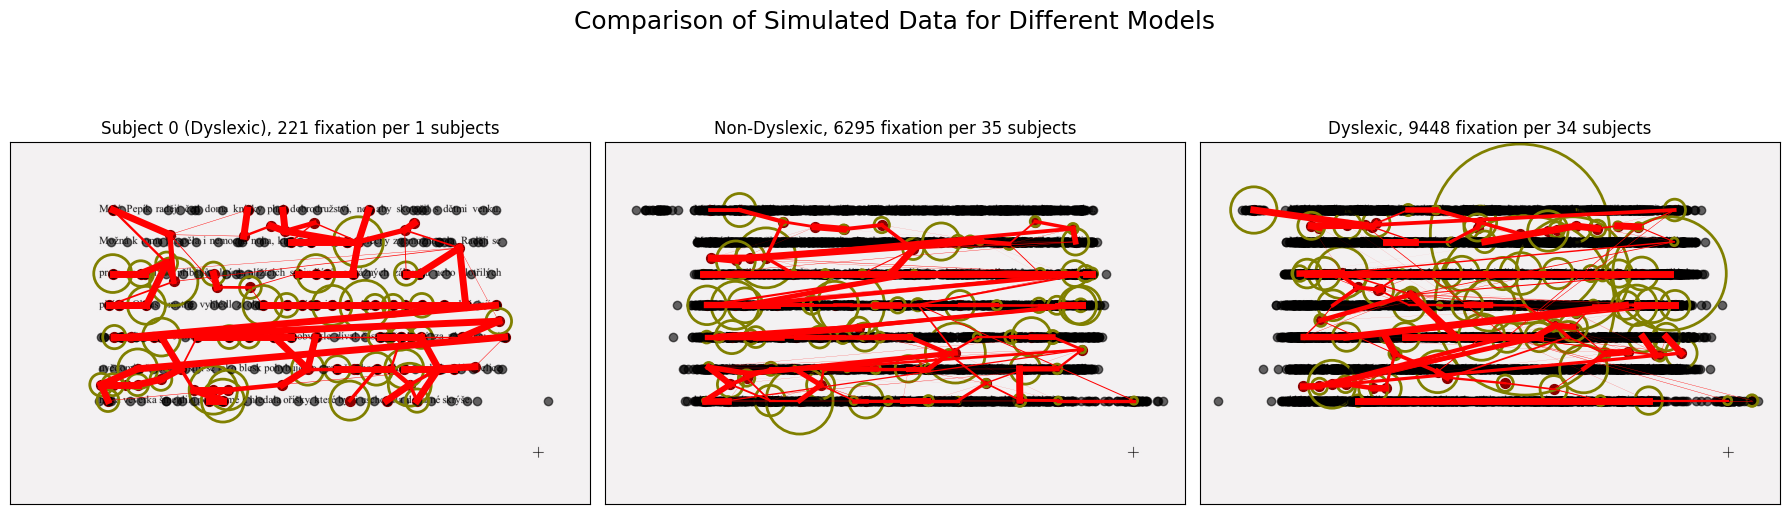

In [452]:
plot_multiple_simulations(DyslexiaDat, [DyslexiaDat.stimuli[stimn]]*3, [[subj_res_g1[0][0][0]], [results1[0][0][0]], [results1[1][0][0]]], [X0,X1,X2], [Y0,Y1,Y2], [[100]]*3, [[l0],[l1],[l2]], labels=['Subject 0 (Dyslexic)', 'Non-Dyslexic', 'Dyslexic'])

In [476]:
X0, Y0, l0 = DyslexiaDat.get_data(DyslexiaDat.stimuli[stimn], group=1, subject=0)
print('BIC score with Non-Dyslexic (lower is better):')
print('Model 0 (Non-Dyslexic): ',results0[0][0][0].bic(np.column_stack((X0, Y0)),l0)/l0)
print('Model 1 (Dyslexic): ',results0[1][0][0].bic(np.column_stack((X0, Y0)),l0)/l0)

BIC score with Non-Dyslexic (lower is better):
Model 0 (Non-Dyslexic):  272.29623780345827
Model 1 (Dyslexic):  271.9052317945887
